In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## Convolutional Neural Network

```python
합성곱 신경망 
```

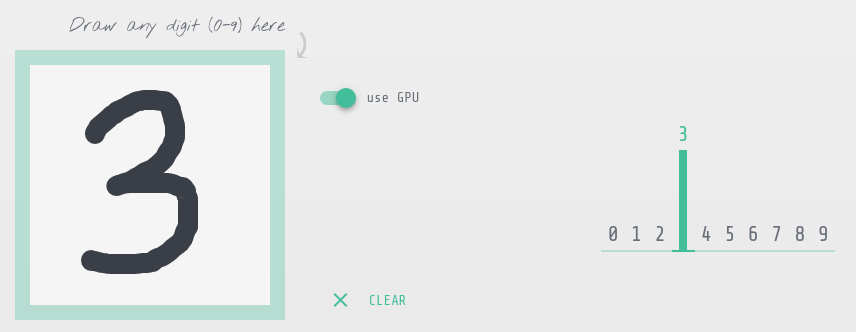

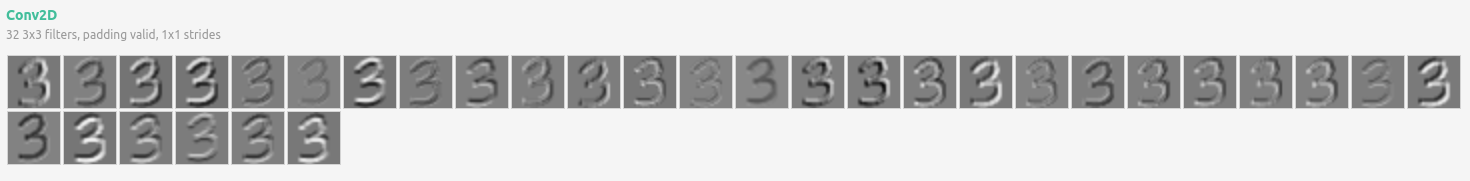

```
Conv2D
- feature를 뽑아내는 3x3 filter
- filter 개수는 32개 
- neural network에서 perceptron이 32개있는 것과 유사하다 
- 3x3 filter는 처음에 랜덤하게 숫자가 정해진다 
- linear연산이기 때문에 다양한 조합을 만들수가 없다 
- Hyperparameter: filter 개수, filter 모양, padding, strides 
- 3차원 연산
```

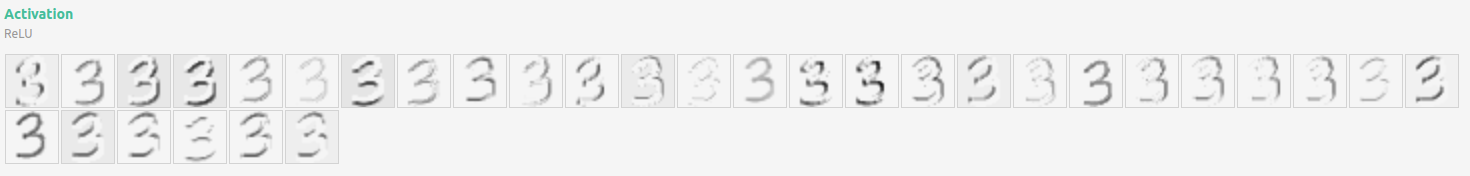

```
Activation - ReLU
- 0보다 작은 값은 0으로 0보다 큰 값은 값 그대로 출력한다 
- non-linear한 함수를 활용하여 다양한 조합을 만든다
```

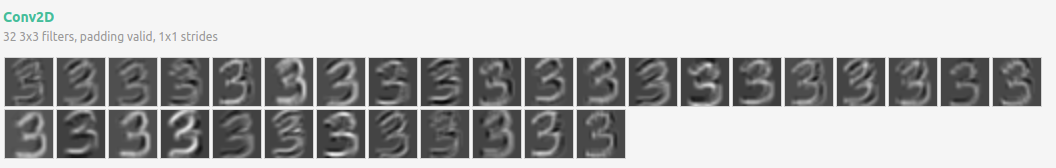

```
Conv2D
- filter를 다시 한번 더 통과 시킨다
- 원본 데이터에서 filter를 적용하면서 특징을 배워간다 
- 가장 특징이 잘 나타내도록 변화 하는 작업을 수행한다 
```

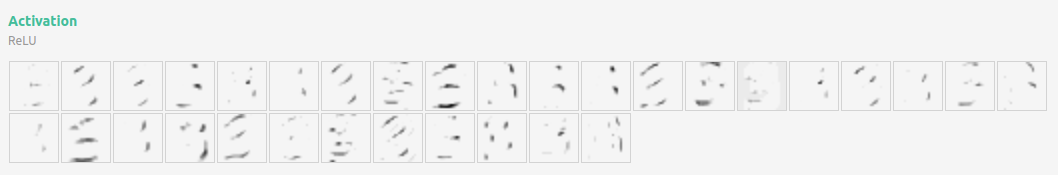

```
Activation
- filter 하나당 9개 weight를 갖고 총 32개 filter가 있기 때문에 총 288개 weight가 생긴다 
```

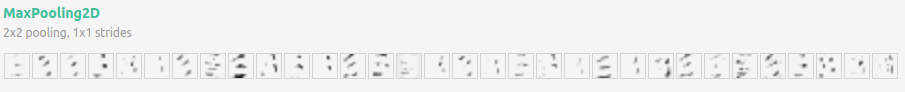

```
MaxPooling2D
- 계산 복잡도를 줄이기 위해서 Maxpooling을 사용하여 크기를 줄인다
- 숫자 데이터에 대한 서로 다른 32가지 관점으로 해석을 한 후 데이터를 만들어 낸다   
```

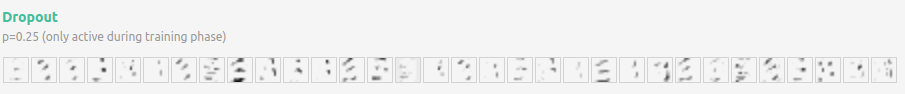

```
Dropout 
- dropout을 사용하게 되면 좀 더 의미 있는 특징을 추출하게 된다 
- 노드들을 무작위로 생략시키면서 학습을 하게되면 parameter들의 co-adaptation되는 것을 막을 수 있다 

※ co-adaptation : 학습하는 도중 같은 층에서 두 개 이상의 노드의 입력 및 연결강도가 같아지게 되면, 아무리 학습이 진행되어도 그 노드들은 같은 일을 수행하게 되어 불필요한 중복이 
생기는 문제
```

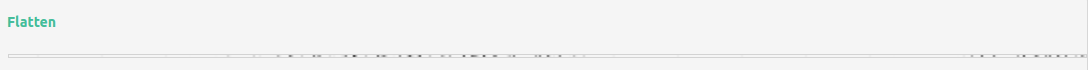

```
Flatten 
- 특징이 잘 나타나도록 변경된 데이터 셋을 학습시키기 위해 1차원 데이터로 변환한다 
```

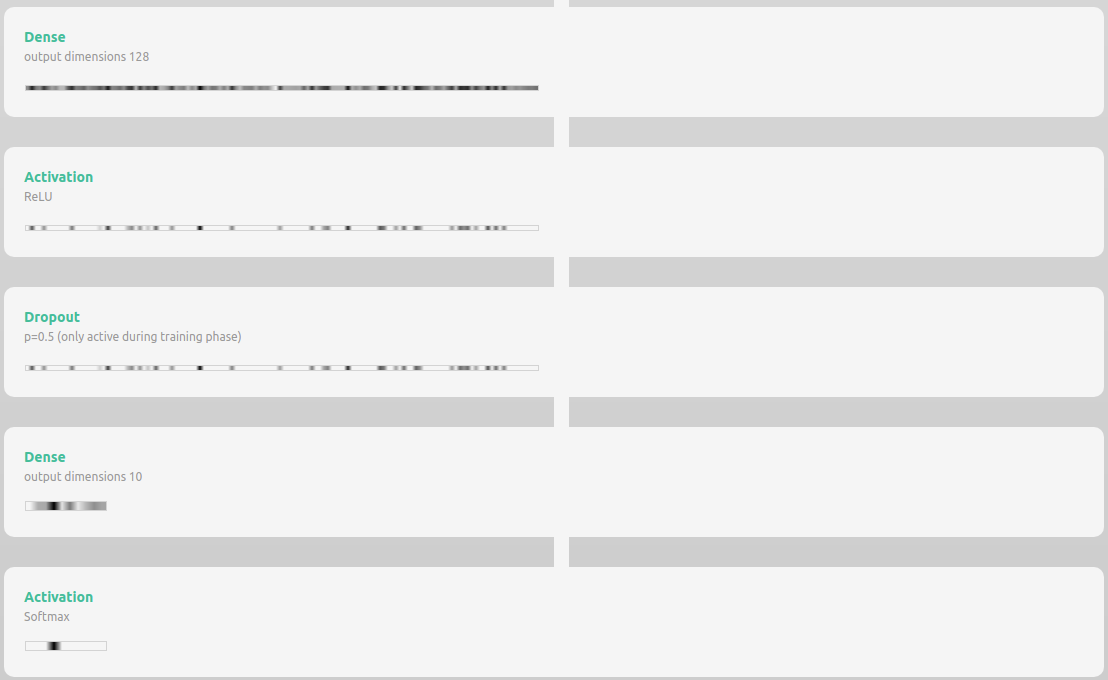

```
최종적으로 0-9까지의 특징을 가장 잘 파악할 수 있는 32가지 filter를 학습하게 된다 
```

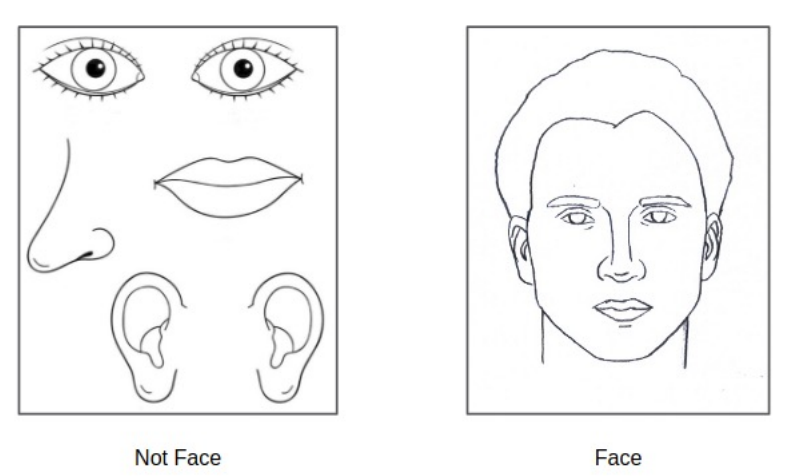

```
CNN의 문제점 중 하나는 사람의 얼굴 특징이 모두 있지만 분리되어 있는 사진인 경우에도 얼굴이라고 인식하는 오류를 범한다 
```

## 3차원 연산 

```
CNN은 color이미지 일때 R,G,B 체널로 분리시켜 3차원 연산을 한다 
CNN에서는 흑백 이미지일때에도 차원을 증가시켜 3차원 연산을 한다 (채널 데이터를 갖고 있어야 한다)
CNN에서 이미지를 변화시키는 이유는 구분시키는 특징을 잘 파악하는 데이터로 변화시키기 위해서 이다 
서로 분리된 채널에 의한 이미지들은 element wise 연산을 통해 하나의 데이터에 대한 특징을 파악할 수 있다
```

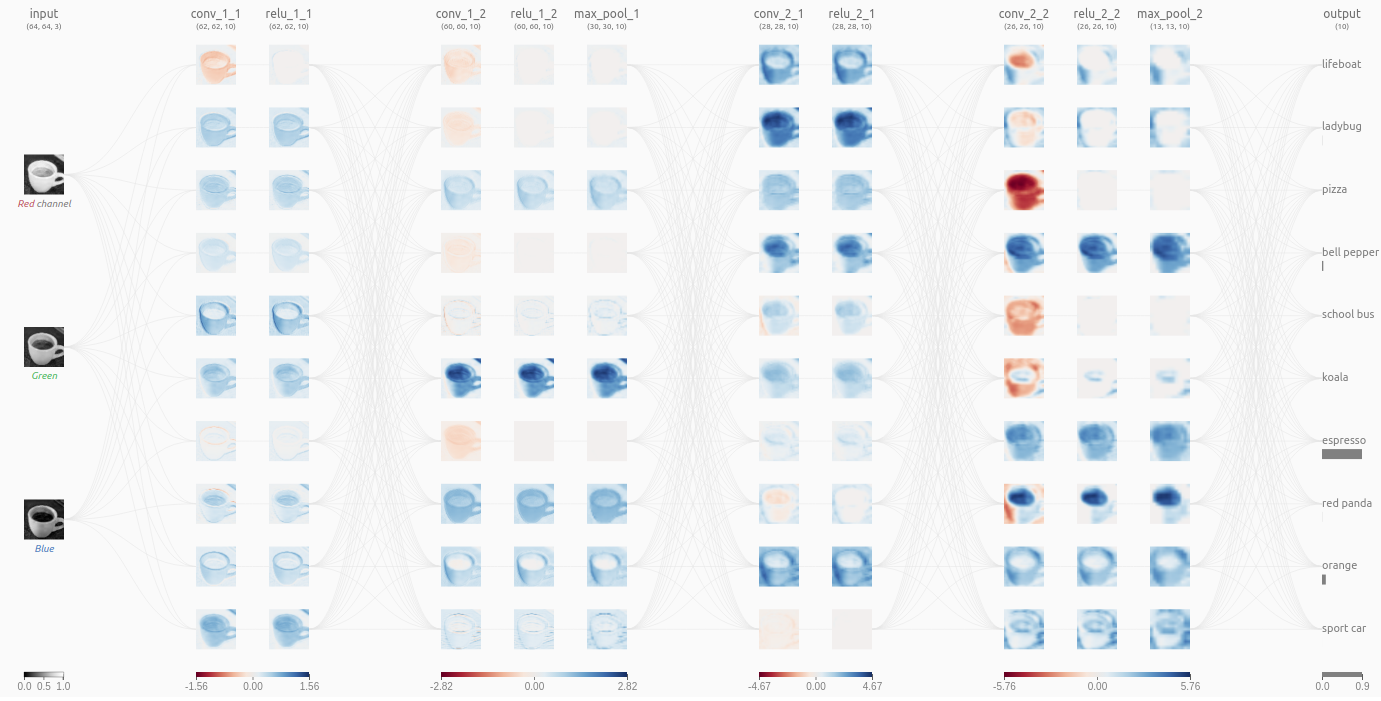

### Reference 

[Basic Convnet for MNIST](https://transcranial.github.io/keras-js/#/mnist-cnn)

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=7f7d8ca6131d714a1ae9bf6eae25c89c4e3ad3e34577aba5e9316c4097dee353
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## 초기값의 중요성

In [2]:
import mglearn

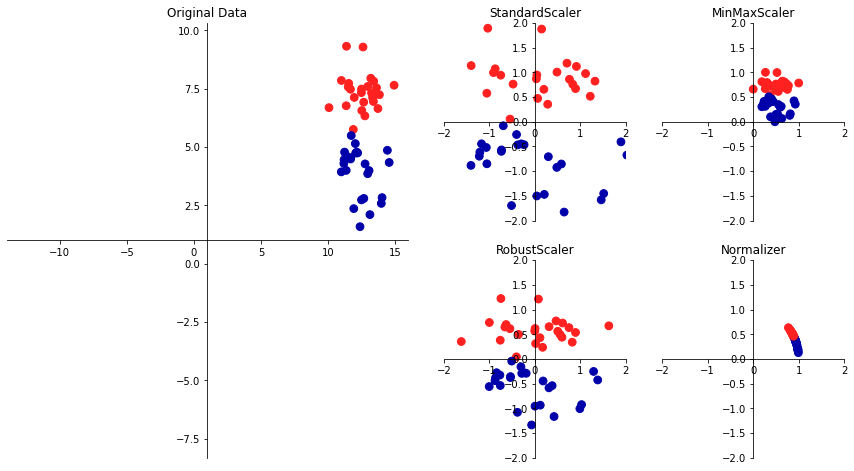

In [5]:
# dtype이 uint8일 때 최대값은 255, 최소값은 0 
# MinMaxScaler로 정규화 할 경우 0과 1사이로 값이 바뀌기 때문에 정사각형 형태로 데이터가 분포한다   
# 따라서 방향에 대한 크기변화가 없기 때문에 빠른 학습속도와 정확한 학습결과를 기대할 수 있다 
mglearn.plot_scaling.plot_scaling() 

## 왜 convolution 연산에 대해서 합을 할까?

```
convolution 연산을 할때 element wise 연산을 하게되면(분리된 채널에서 합쳐질 때)특성을 알 수 없을 수도 있다
물론 depth wise convolution은 각각의 특성만 독립적으로 연산하는 경우도 있다 
그러나 더하는 것이 성능이 더 좋고, convolution 연산 결과가 원본 이미지의 의미가 변하는 경우는 거의 나오지 않는다 

왜 그런 경우가 나오지 않을까?  
weight와 bias는 학습을 통해서 찾기 때문에 채널별로 서로 다른 결과가 나올수 있도록 학습이 되기 때문이다
(kernel은 특성을 잘 파악하도록 학습이 된다) 

합하는 것이 왜 좋을까? 
전통적인 NN에 영향을 받아서 hierarchy한 것을 고려했기 때문에 hierarchy 특징을 학습할 수 있다 
```

## 중간 결과 및 filter 이미지 확인하기


In [25]:
import tensorflow as tf 
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [4]:
data = load_digits()

In [6]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

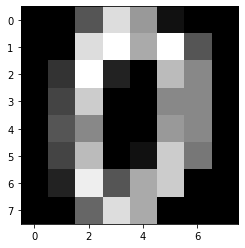

In [9]:
plt.imshow(data.images[0], cmap='gray')

In [10]:
data.images.shape

(1797, 8, 8)

In [11]:
image = data.images.reshape(1797,8,8,1) # CNN에서 사용하는 연산하기 위해서 데이터 하나가 3차원이 되도록 데이터를 변화 시켰다

In [13]:
layer1 = tf.keras.layers.Conv2D(2, (3,3)) # filter 개수, filter 모양(단축 표현 가능 (3,3)=>3)

In [14]:
layer1.built # 일시키기 전까지 초기화가 안된다 => lazy Evaluation / 내부적으로 im2col

False

In [15]:
layer1(image[0]) # 동시에 여러개 연산하기 때문에 안된다 / 데이터를 하나 연산하더라도 4차원 형태로 만들어 줘야 한다 

ValueError: ignored

In [16]:
layer1(image[0][tf.newaxis]) 

<tf.Tensor: shape=(1, 6, 6, 2), dtype=float32, numpy=
array([[[[-10.622592  ,   0.6645769 ],
         [-17.233952  ,  10.468588  ],
         [-14.855642  ,   9.118145  ],
         [-15.18894   ,   2.6298568 ],
         [-13.4780655 ,   7.0054035 ],
         [ -5.6591477 ,   7.2931743 ]],

        [[-14.596352  ,   2.7477493 ],
         [-16.461687  ,   7.134545  ],
         [ -8.46327   ,   3.701262  ],
         [-12.294258  ,   1.146481  ],
         [-13.634556  ,   3.8572376 ],
         [ -5.975335  ,   8.292049  ]],

        [[-14.3555565 ,   3.0107014 ],
         [ -9.104046  ,   4.7153425 ],
         [ -1.3667734 ,   4.3214397 ],
         [ -9.231415  ,   0.47152564],
         [-13.976131  ,   2.8414476 ],
         [ -5.8030467 ,   7.6927614 ]],

        [[-13.614567  ,   1.567383  ],
         [ -7.204097  ,   5.006265  ],
         [ -0.2758534 ,   5.59093   ],
         [ -9.567868  ,   0.03668392],
         [-13.996439  ,   5.221743  ],
         [ -5.7096176 ,   8.017913  ]],

  

In [17]:
layer1.weights # weight를 xavier glorot uniform방식으로 초기화 하고 연산을 한다 

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 2) dtype=float32, numpy=
 array([[[[ 0.06324342,  0.15853754]],
 
         [[-0.14388585, -0.19692683]],
 
         [[-0.40798104,  0.04143384]]],
 
 
        [[[-0.24675035, -0.07410842]],
 
         [[-0.3730538 ,  0.22583339]],
 
         [[-0.22161803,  0.13686094]]],
 
 
        [[[ 0.11666891,  0.40331647]],
 
         [[-0.17990309,  0.3350769 ]],
 
         [[-0.34412956, -0.15513435]]]], dtype=float32)>,
 <tf.Variable 'conv2d_1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [18]:
len(layer1.weights)

2

In [19]:
layer1.weights[0] # filter / kernel은 (3,3,1)가 2개 있다로 해석해야 한다 

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 2) dtype=float32, numpy=
array([[[[ 0.06324342,  0.15853754]],

        [[-0.14388585, -0.19692683]],

        [[-0.40798104,  0.04143384]]],


       [[[-0.24675035, -0.07410842]],

        [[-0.3730538 ,  0.22583339]],

        [[-0.22161803,  0.13686094]]],


       [[[ 0.11666891,  0.40331647]],

        [[-0.17990309,  0.3350769 ]],

        [[-0.34412956, -0.15513435]]]], dtype=float32)>

In [21]:
layer1.weights[0][...,0] # 첫번째 filter 

<tf.Tensor: shape=(3, 3, 1), dtype=float32, numpy=
array([[[ 0.06324342],
        [-0.14388585],
        [-0.40798104]],

       [[-0.24675035],
        [-0.3730538 ],
        [-0.22161803]],

       [[ 0.11666891],
        [-0.17990309],
        [-0.34412956]]], dtype=float32)>

In [22]:
layer1.weights[0][...,1] # 두번째 filter 

<tf.Tensor: shape=(3, 3, 1), dtype=float32, numpy=
array([[[ 0.15853754],
        [-0.19692683],
        [ 0.04143384]],

       [[-0.07410842],
        [ 0.22583339],
        [ 0.13686094]],

       [[ 0.40331647],
        [ 0.3350769 ],
        [-0.15513435]]], dtype=float32)>

In [26]:
np.squeeze(layer1.weights[0][...,1])

array([[ 0.15853754, -0.19692683,  0.04143384],
       [-0.07410842,  0.22583339,  0.13686094],
       [ 0.40331647,  0.3350769 , -0.15513435]], dtype=float32)

In [27]:
tf.reshape((np.squeeze(layer1.weights[0][...,1])),(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.15853754, -0.19692683,  0.04143384],
       [-0.07410842,  0.22583339,  0.13686094],
       [ 0.40331647,  0.3350769 , -0.15513435]], dtype=float32)>

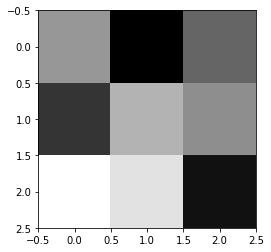

In [32]:
plt.imshow(np.squeeze(layer1.weights[0][...,1]), cmap='gray')

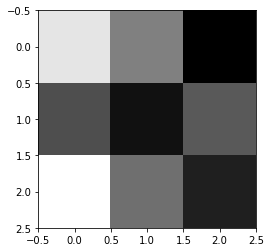

In [34]:
plt.imshow(np.squeeze(layer1.weights[0][...,0]), cmap='gray')

In [20]:
layer1.weights[1] # bias

<tf.Variable 'conv2d_1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [36]:
layer1_result = layer1(image[0][tf.newaxis])

In [39]:
layer1_result.shape

TensorShape([1, 6, 6, 2])

In [38]:
layer1_result[0,...,0]

<tf.Tensor: shape=(6, 6), dtype=float32, numpy=
array([[-10.622592 , -17.233952 , -14.855642 , -15.18894  , -13.4780655,
         -5.6591477],
       [-14.596352 , -16.461687 ,  -8.46327  , -12.294258 , -13.634556 ,
         -5.975335 ],
       [-14.3555565,  -9.104046 ,  -1.3667734,  -9.231415 , -13.976131 ,
         -5.8030467],
       [-13.614567 ,  -7.204097 ,  -0.2758534,  -9.567868 , -13.996439 ,
         -5.7096176],
       [-13.090911 ,  -9.931416 ,  -5.137371 , -12.04954  , -11.825691 ,
         -4.75425  ],
       [-10.976872 , -13.707218 , -12.3282795, -12.9457   , -10.296714 ,
         -3.2092843]], dtype=float32)>

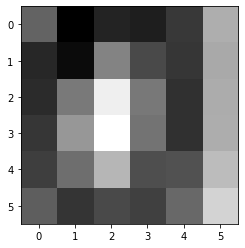

In [41]:
plt.imshow(layer1_result[0,...,0], cmap='gray') # 8x8 이미지에서 3x3 filter를 썻기 때문에 8-3+1 = 6 => 6x6 결과가 나온다 

## Convolution layer를 통과한 데이터 

In [43]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)
input_ = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(10,3)(input_)
model = tf.keras.models.Model(input_,x)

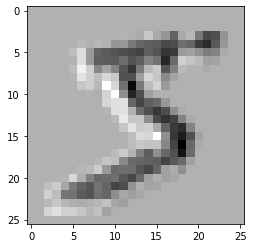

In [46]:
plt.imshow(model(X_train)[0][...,0], cmap='gray')

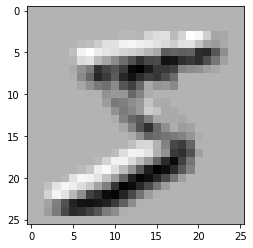

In [47]:
plt.imshow(model(X_train)[0][...,1], cmap='gray')

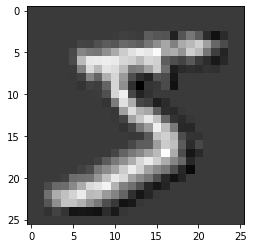

In [48]:
plt.imshow(model(X_train)[0][...,2], cmap='gray')

## Convolution layer -> ReLU를 통과한 데이터

In [49]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)
input_ = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(10,3)(input_)
x = tf.keras.layers.ReLU()(x)
model = tf.keras.models.Model(input_,x)

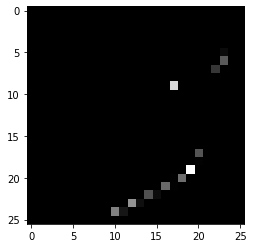

In [50]:
plt.imshow(model(X_train)[0][...,0], cmap='gray')

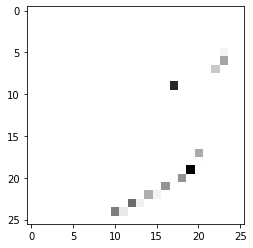

In [51]:
plt.imshow(model(X_train)[0][...,0], cmap='binary')

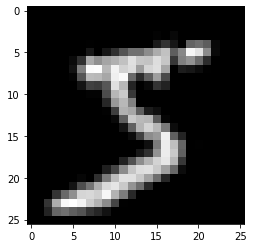

In [52]:
plt.imshow(model(X_train)[0][...,1], cmap='gray')

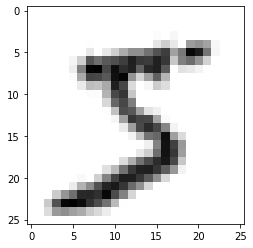

In [53]:
plt.imshow(model(X_train)[0][...,1], cmap='binary')

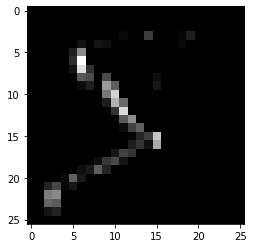

In [54]:
plt.imshow(model(X_train)[0][...,2], cmap='gray')

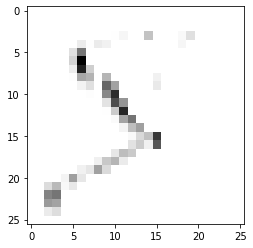

In [55]:
plt.imshow(model(X_train)[0][...,2], cmap='binary')

## LeNet-5

> Gradient-Based Learning Applied to Document Recognition   
> Yann LeCun, Yoshua Bengio 등..

```
최초의 Convolutional Neural network가 상업적으로 성공한 논문
```

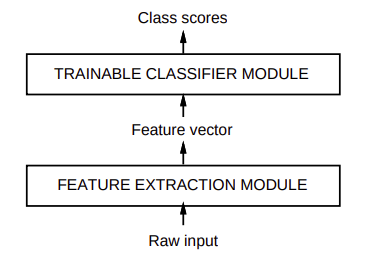

```
Feature extracion module은 trainable classifier module의 성능을 높이기 위한 수단이었다 
나중에 Feature extracion module와 trainable classifier module를 결합해서 End-to-End로 만들었다 
```

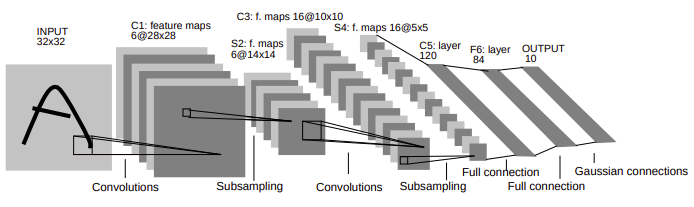

```
32x32를 한 이유는 정 중앙에 숫자를 넣기 위해서 조금 더 크게 만들었다 
=> 제약 조건을 만들었다 
성능을 높이기 위해서 가정을 추가한 것이다 

이미지 크기가 크면 클수록 연산해야 할것이 많아지고, 많은 데이터가 필요하다 
그런데 subsampling을 한다는 것은 줄이는 것이기 때문에 정보의 손실이 발생한다 
이 지점에서 trade off가 발생한다 

데이터가 많을 경우 pooling을 안하는 것이 성능이 더 좋다 하지만, 데이터가 적을 경우는 pooling을 하는 것이 더 좋다  

subsampling으로 계산 복잡도를 줄였기 때문에 특징을 더 늘려야 한다 (이미지 피라미드) 
데이터가 많으면 많을 수록 column이 많이 있는 것이 좋다(풍부한 nuance를 갖기 때문에)
특징이 있는지 없는 데이터 형태로 변환 시킨다 
```

## Subsampling

```
전체에서 일부만 뽑아서 줄이는 것 ex) pooling 
```